<a href="https://colab.research.google.com/github/Onyimatics/fashion_mnist_classification_app/blob/master/DL_Challenge_1_Fashion_Mnist_OnyinyeEzike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras import layers
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, InputLayer, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from tensorflow.keras.regularizers import l2

In [ ]:


# load in the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# make sure that the data is all the right shape
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.reshape(x_train, (60000, 28, 28, 1))
x_test = np.reshape(x_test, (10000, 28, 28, 1))

# One hot encode the output data
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6977 - loss: 0.8822 - val_accuracy: 0.8232 - val_loss: 0.5065
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8333 - loss: 0.4754 - val_accuracy: 0.8382 - val_loss: 0.4603
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8486 - loss: 0.4336 - val_accuracy: 0.8408 - val_loss: 0.4484
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8561 - loss: 0.4156 - val_accuracy: 0.8443 - val_loss: 0.4407
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8584 - loss: 0.3999 - val_accuracy: 0.8469 - val_loss: 0.4391
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8607 - loss: 0.3898 - val_accuracy: 0.8448 - val_loss: 0.4296
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8652 - loss: 0.3852 - val_accuracy: 0.8440 - val_loss: 0.4471
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8638 - loss: 0.383

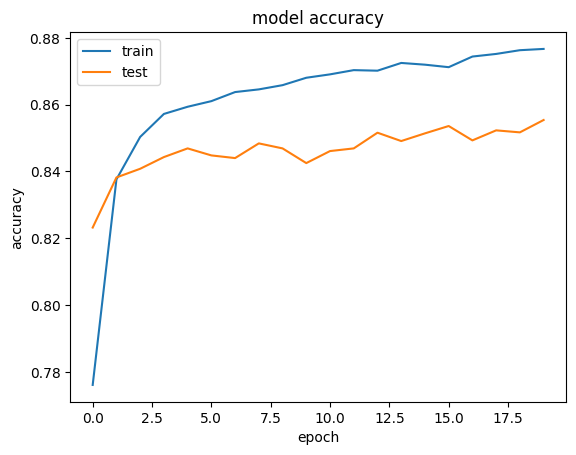

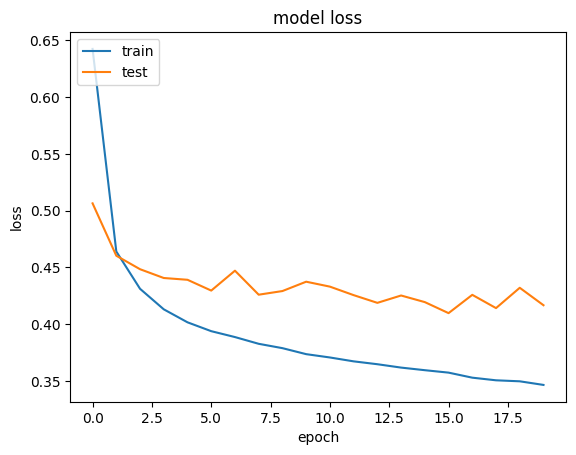

In [ ]:
# Create, compile and fit the model with the original MNIST data
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

# plot the history of the training
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

##**DATA AUGMENTATION**

In [ ]:
# setup the generator that will augment the images
train_gen = ImageDataGenerator(rotation_range=8,   # rotate
                               width_shift_range=0.08,  # width shiift
                               shear_range=0.3,   # shear
                               height_shift_range=0.08, # height shift
                               zoom_range=0.08 )   # zoom


# Generate aungemnted images for the training data
x_train = np.reshape(x_train, (60000,28,28,1))
training_set = train_gen.flow(x_train, y_train, batch_size=x_train.shape[0])

# Generate aungemnted images for the test data
x_test = np.reshape(x_test, (10000,28,28,1))
test_set= train_gen.flow(x_test, y_test, batch_size=x_test.shape[0])

# extract the augmented images from the output flow of the generator
# add the augmented images generated from the training data to the original training data
i = 0
for x, y in training_set:
  if i < 2:
    print(i)
    x_train = np.concatenate((x_train, x))
    y_train = np.concatenate((y_train, y))
    print(x_train.shape)
    print(y_train.shape)
  else:
    break
  i += 1

# add the augmented images generated from the test data to the original test data
i = 0
for x, y in test_set:
  if i < 2:
    print(i)
    x_test_aug = np.concatenate((x_test, x))
    y_test_aug = np.concatenate((y_test, y))
    print(x_test.shape)
    print(y_test.shape)
  else:
    break
  i += 1

0
(120000, 28, 28, 1)
(120000, 10)
1
(180000, 28, 28, 1)
(180000, 10)
0
(10000, 28, 28, 1)
(10000, 10)
1
(10000, 28, 28, 1)
(10000, 10)


##**FORMATIVE SUBMISSION**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         803,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 844,234 (3.22 MB)

 Trainable params: 843,722 (3.22 MB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6417 - loss: 1.0626 - val_accuracy: 0.8580 - val_loss: 0.4549
Epoch 2/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8074 - loss: 0.5712 - val_accuracy: 0.8799 - val_loss: 0.3807
Epoch 3/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8365 - loss: 0.4918 - val_accuracy: 0.8907 - val_loss: 0.3453
Epoch 4/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8542 - loss: 0.4448 - val_accuracy: 0.9004 - val_loss: 0.3208
Epoch 5/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8660 - loss: 0.4100 - val_accuracy: 0.9037 - val_loss: 0.3072
Epoch 6/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8734 - loss: 0.3873 - val_accuracy: 0.9084 - val_loss: 0.2939
Epoch 7/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8819 - loss: 0.3648 - val_accuracy: 0.9133 - val_loss: 0.2839
Epoch 8/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8878 - loss: 0.3470 - val_accura

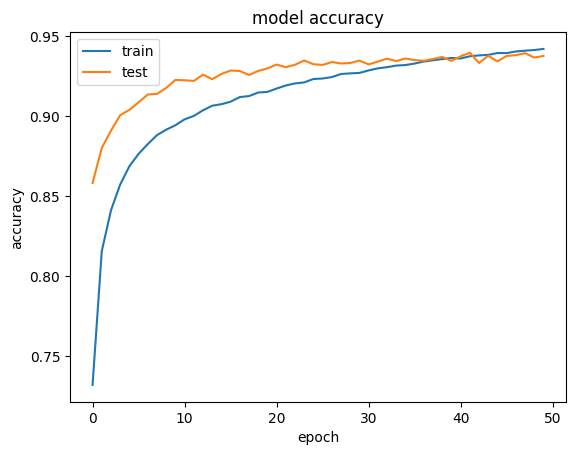

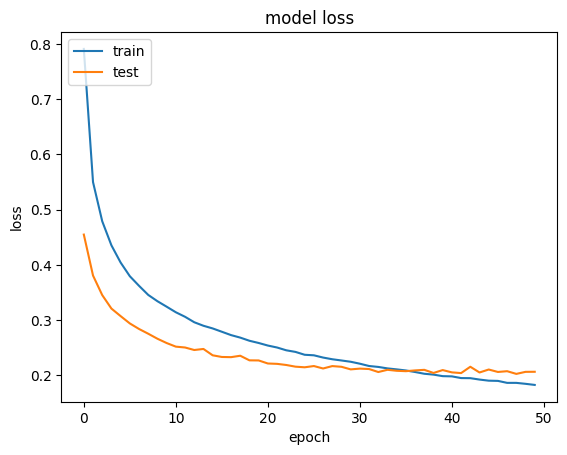

In [ ]:
# Create, compile and fit the model with the original MNIST data
model = keras.Sequential()
model.add(Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=10, activation='softmax'))

model.summary()

opt = Adam(learning_rate=0.0001)

model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=250, validation_data = (x_test, y_test), verbose=1)

# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# print("Epoch | Train Accuracy | Validation Accuracy")
# for i, (train_acc, val_acc) in enumerate(zip(history.history['accuracy'], history.history['val_accuracy']), start=1):
#     print(f"{i:5d} | {train_acc:.4f}        | {val_acc:.4f}")

print("Epoch | Validation Accuracy")
for i, (train_acc, val_acc) in enumerate(zip(history.history['accuracy'], history.history['val_accuracy']), start=1):
    print(f"{i:5d}     | {val_acc:.4f}")

Epoch | Validation Accuracy
    1     | 0.8580
    2     | 0.8799
    3     | 0.8907
    4     | 0.9004
    5     | 0.9037
    6     | 0.9084
    7     | 0.9133
    8     | 0.9137
    9     | 0.9174
   10     | 0.9224
   11     | 0.9222
   12     | 0.9218
   13     | 0.9257
   14     | 0.9229
   15     | 0.9261
   16     | 0.9283
   17     | 0.9280
   18     | 0.9255
   19     | 0.9280
   20     | 0.9296
   21     | 0.9320
   22     | 0.9304
   23     | 0.9319
   24     | 0.9346
   25     | 0.9322
   26     | 0.9318
   27     | 0.9336
   28     | 0.9327
   29     | 0.9330
   30     | 0.9345
   31     | 0.9321
   32     | 0.9339
   33     | 0.9357
   34     | 0.9342
   35     | 0.9358
   36     | 0.9348
   37     | 0.9344
   38     | 0.9355
   39     | 0.9368
   40     | 0.9343
   41     | 0.9372
   42     | 0.9394
   43     | 0.9330
   44     | 0.9375
   45     | 0.9340
   46     | 0.9374
   47     | 0.9379
   48     | 0.9391
   49     | 0.9364
   50     | 0.9374


In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Final Validation Accuracy: {acc:.4f}")

Final Validation Accuracy: 0.9374


In [ ]:
# clear session
keras.backend.clear_session()

#**FINAL SUBISSION**

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,758,346 (6.71 MB)

 Trainable params: 1,757,834 (6.71 MB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.6659 - loss: 0.9802 - val_accuracy: 0.8555 - val_loss: 0.4501
Epoch 2/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8300 - loss: 0.5152 - val_accuracy: 0.8950 - val_loss: 0.3435
Epoch 3/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8578 - loss: 0.4369 - val_accuracy: 0.9027 - val_loss: 0.3160
Epoch 4/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8753 - loss: 0.3871 - val_accuracy: 0.9102 - val_loss: 0.2952
Epoch 5/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8833 - loss: 0.3638 - val_accuracy: 0.9166 - val_loss: 0.2748
Epoch 6/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8904 - loss: 0.3391 - val_accuracy: 0.9171 - val_loss: 0.2712
Epoch 7/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8968 - loss: 0.3225 - val_accuracy: 0.9202 - val_loss: 0.2610
Epoch 8/50
720/720 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9024 - loss: 0.3057 - 

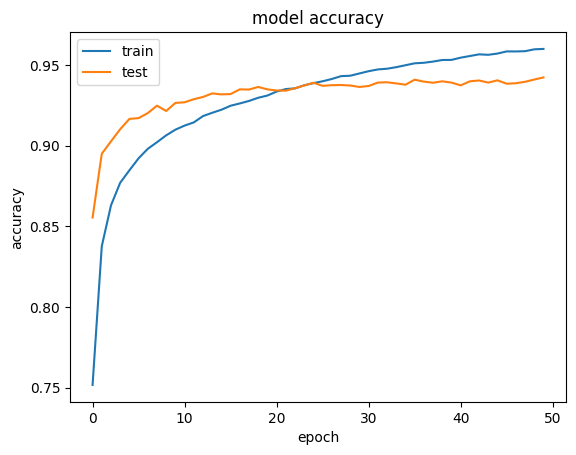

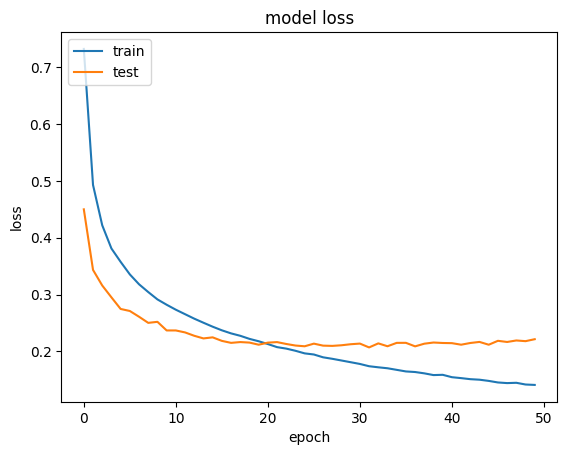

In [ ]:
# Create, compile and fit the model
model = keras.Sequential()
model.add(Conv2D(128, (3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=10, activation='softmax'))

model.summary()

opt = Adam(learning_rate=0.0001)

model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=250, validation_data = (x_test, y_test), verbose=1)

model.save("latest_fashion_mnist_model.keras")

# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Found 9423 correctly classified samples
Found 577 misclassified samples


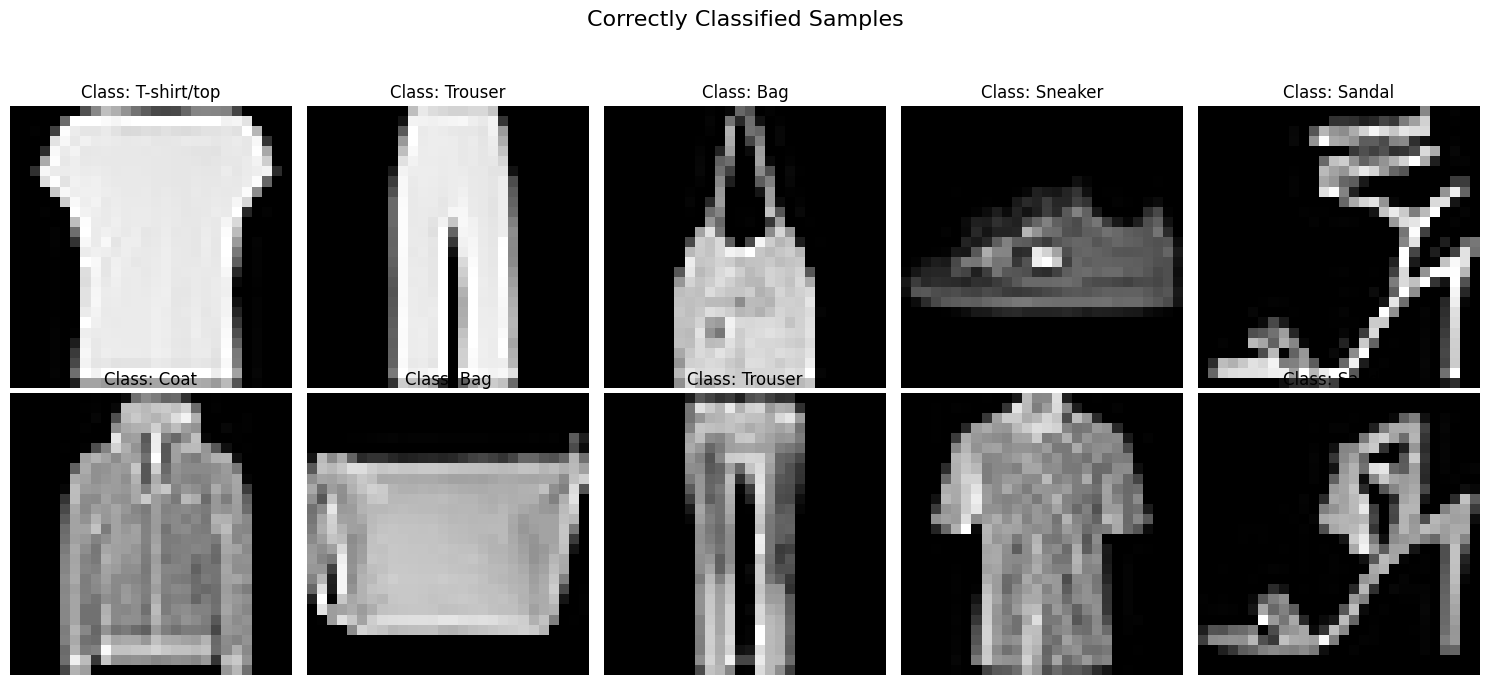

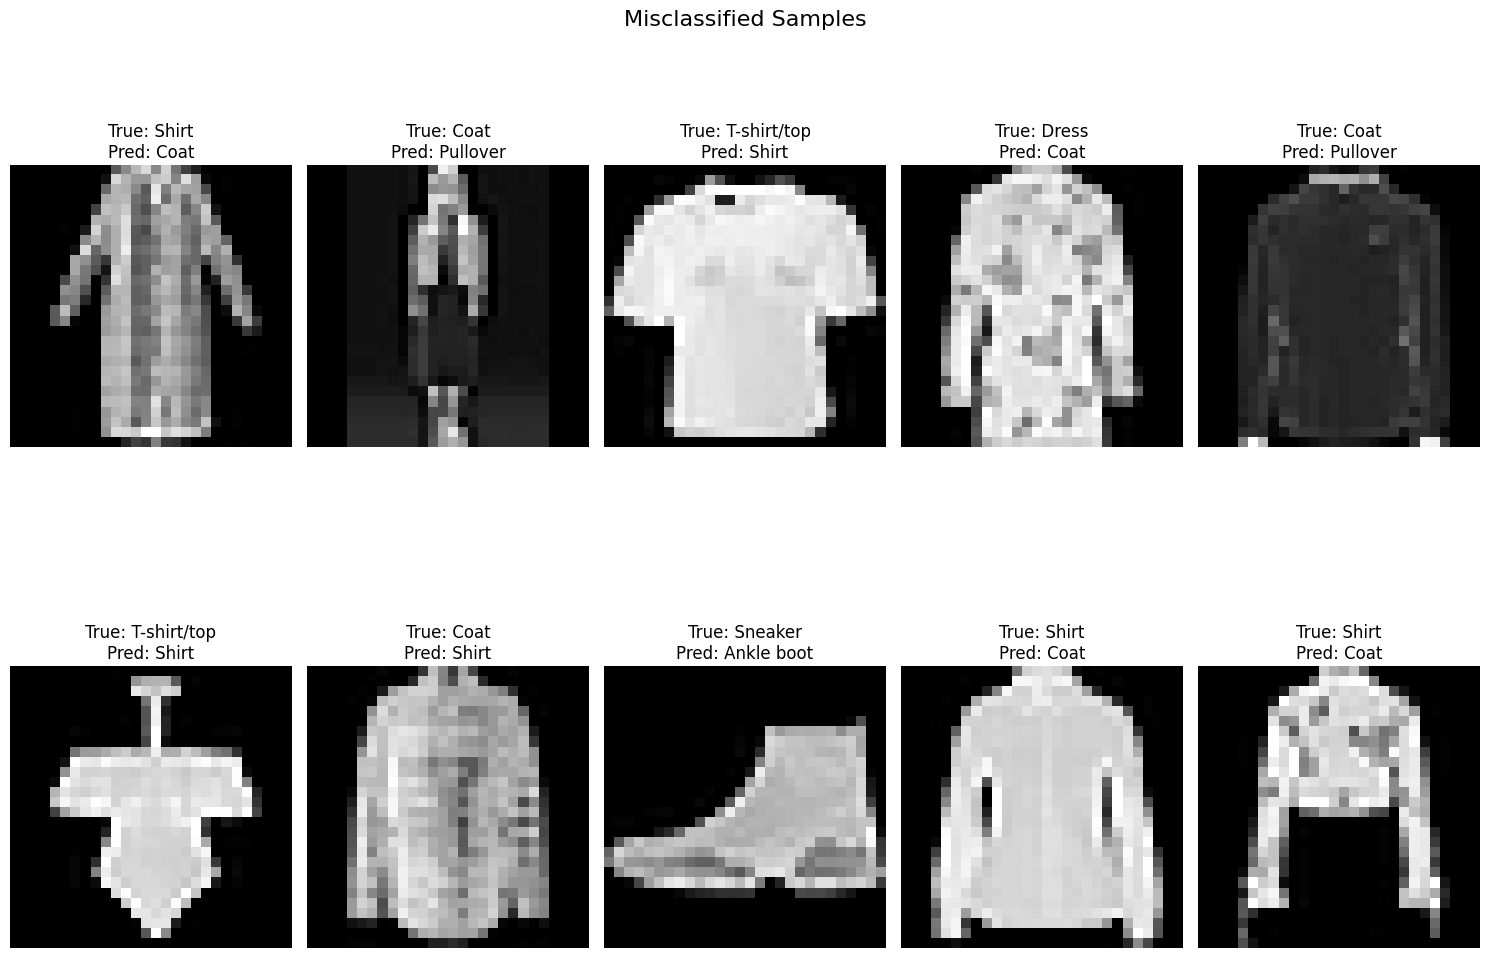

Total test samples: 10000
Correctly classified: 9423 (94.23%)
Misclassified: 577 (5.77%)

Per-class accuracy:
T-shirt/top: 884/1000 (88.40%)
Trouser: 992/1000 (99.20%)
Pullover: 905/1000 (90.50%)
Dress: 951/1000 (95.10%)
Coat: 931/1000 (93.10%)
Sandal: 992/1000 (99.20%)
Shirt: 828/1000 (82.80%)
Sneaker: 989/1000 (98.90%)
Bag: 992/1000 (99.20%)
Ankle boot: 959/1000 (95.90%)


In [ ]:
model.save("fashion_mnist_model_latest.keras")

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Make predictions using your existing model and data
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Convert your one-hot encoded y_test back to class indices
y_test_indices = np.argmax(y_test, axis=1)

# Identify correctly and incorrectly classified samples
correct_indices = np.where(predicted_classes == y_test_indices)[0]
incorrect_indices = np.where(predicted_classes != y_test_indices)[0]

print(f"Found {len(correct_indices)} correctly classified samples")
print(f"Found {len(incorrect_indices)} misclassified samples")

# Function to visualize correctly classified samples
def plot_correct_samples(n_rows=2, n_cols=5):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 7))

    # Add the title with proper padding
    plt.suptitle("Correctly Classified Samples", fontsize=16, y=0.98)

    # Randomly select samples
    selected_indices = np.random.choice(correct_indices, size=n_rows*n_cols, replace=False)

    for i, ax in enumerate(axes.flat):
        idx = selected_indices[i]
        img = x_test[idx].reshape(28, 28)
        true_class = y_test_indices[idx]

        ax.imshow(img, cmap='gray')
        ax.set_title(f"Class: {class_names[true_class]}")
        ax.axis('off')

    plt.tight_layout()
    # Adjust the layout to add more space at the top for the title
    plt.subplots_adjust(top=0.85)
    plt.savefig('correctly_classified.png', bbox_inches='tight')
    return fig

# Function to visualize misclassified samples
def plot_incorrect_samples(n_rows=2, n_cols=5):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

    # Add the title with proper padding
    plt.suptitle("Misclassified Samples", fontsize=16, y=0.98)

    # Randomly select samples
    selected_indices = np.random.choice(incorrect_indices, size=n_rows*n_cols, replace=False)

    for i, ax in enumerate(axes.flat):
        idx = selected_indices[i]
        img = x_test[idx].reshape(28, 28)
        true_class = y_test_indices[idx]
        pred_class = predicted_classes[idx]

        ax.imshow(img, cmap='gray')
        ax.set_title(f"True: {class_names[true_class]}\nPred: {class_names[pred_class]}")
        ax.axis('off')

    plt.tight_layout()
    # Adjust the layout to add more space at the top for the title
    plt.subplots_adjust(top=0.85, hspace=0.5)
    plt.savefig('misclassified.png', bbox_inches='tight')
    return fig

# Plot the correctly classified samples
correct_fig = plot_correct_samples()
plt.figure(correct_fig.number)
plt.show()

# Plot the misclassified samples
incorrect_fig = plot_incorrect_samples()
plt.figure(incorrect_fig.number)
plt.show()

# Print classification metrics
def print_classification_metrics():
    print(f"Total test samples: {len(y_test_indices)}")
    print(f"Correctly classified: {len(correct_indices)} ({len(correct_indices)/len(y_test_indices)*100:.2f}%)")
    print(f"Misclassified: {len(incorrect_indices)} ({len(incorrect_indices)/len(y_test_indices)*100:.2f}%)")

    # Calculate confusion matrix
    conf_matrix = tf.math.confusion_matrix(y_test_indices, predicted_classes).numpy()

    # Print per-class accuracy
    print("\nPer-class accuracy:")
    for i in range(10):
        class_correct = conf_matrix[i, i]
        class_total = np.sum(conf_matrix[i, :])
        print(f"{class_names[i]}: {class_correct}/{class_total} ({class_correct/class_total*100:.2f}%)")

print_classification_metrics()

In [ ]:
print("Epoch | Validation Accuracy")
for i, (train_acc, val_acc) in enumerate(zip(history.history['accuracy'], history.history['val_accuracy']), start=1):
    print(f"{i:5d}     | {val_acc:.4f}")

Epoch | Validation Accuracy
    1     | 0.8555
    2     | 0.8950
    3     | 0.9027
    4     | 0.9102
    5     | 0.9166
    6     | 0.9171
    7     | 0.9202
    8     | 0.9248
    9     | 0.9215
   10     | 0.9265
   11     | 0.9269
   12     | 0.9288
   13     | 0.9302
   14     | 0.9324
   15     | 0.9318
   16     | 0.9320
   17     | 0.9349
   18     | 0.9348
   19     | 0.9364
   20     | 0.9349
   21     | 0.9342
   22     | 0.9341
   23     | 0.9356
   24     | 0.9373
   25     | 0.9390
   26     | 0.9371
   27     | 0.9375
   28     | 0.9376
   29     | 0.9373
   30     | 0.9364
   31     | 0.9370
   32     | 0.9391
   33     | 0.9393
   34     | 0.9386
   35     | 0.9378
   36     | 0.9409
   37     | 0.9397
   38     | 0.9390
   39     | 0.9399
   40     | 0.9391
   41     | 0.9374
   42     | 0.9399
   43     | 0.9404
   44     | 0.9391
   45     | 0.9405
   46     | 0.9384
   47     | 0.9387
   48     | 0.9396
   49     | 0.9410
   50     | 0.9423


#**PRESENTATION**

##**INTRODUCING FASHION MNIST DATASET**

There are 60,000 training images and 10,000 test images, each labeled with one of 10 classes.

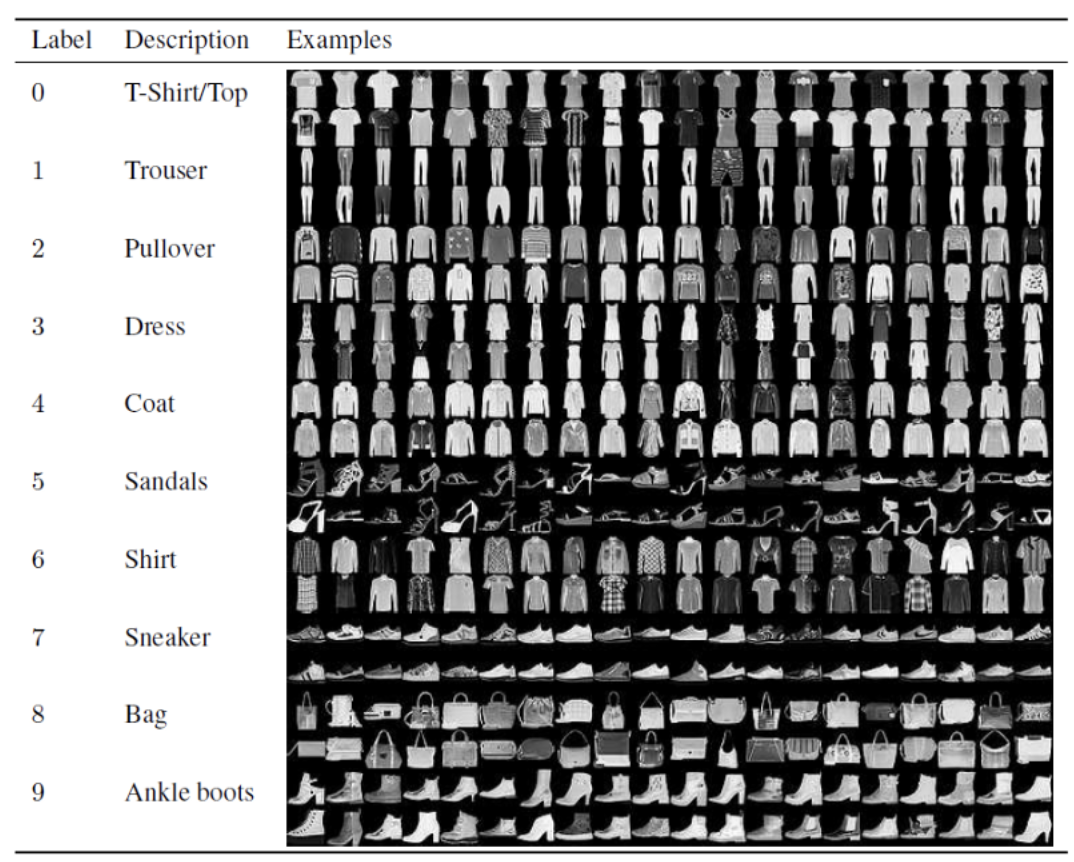

##**MODEL STRUCTURE**

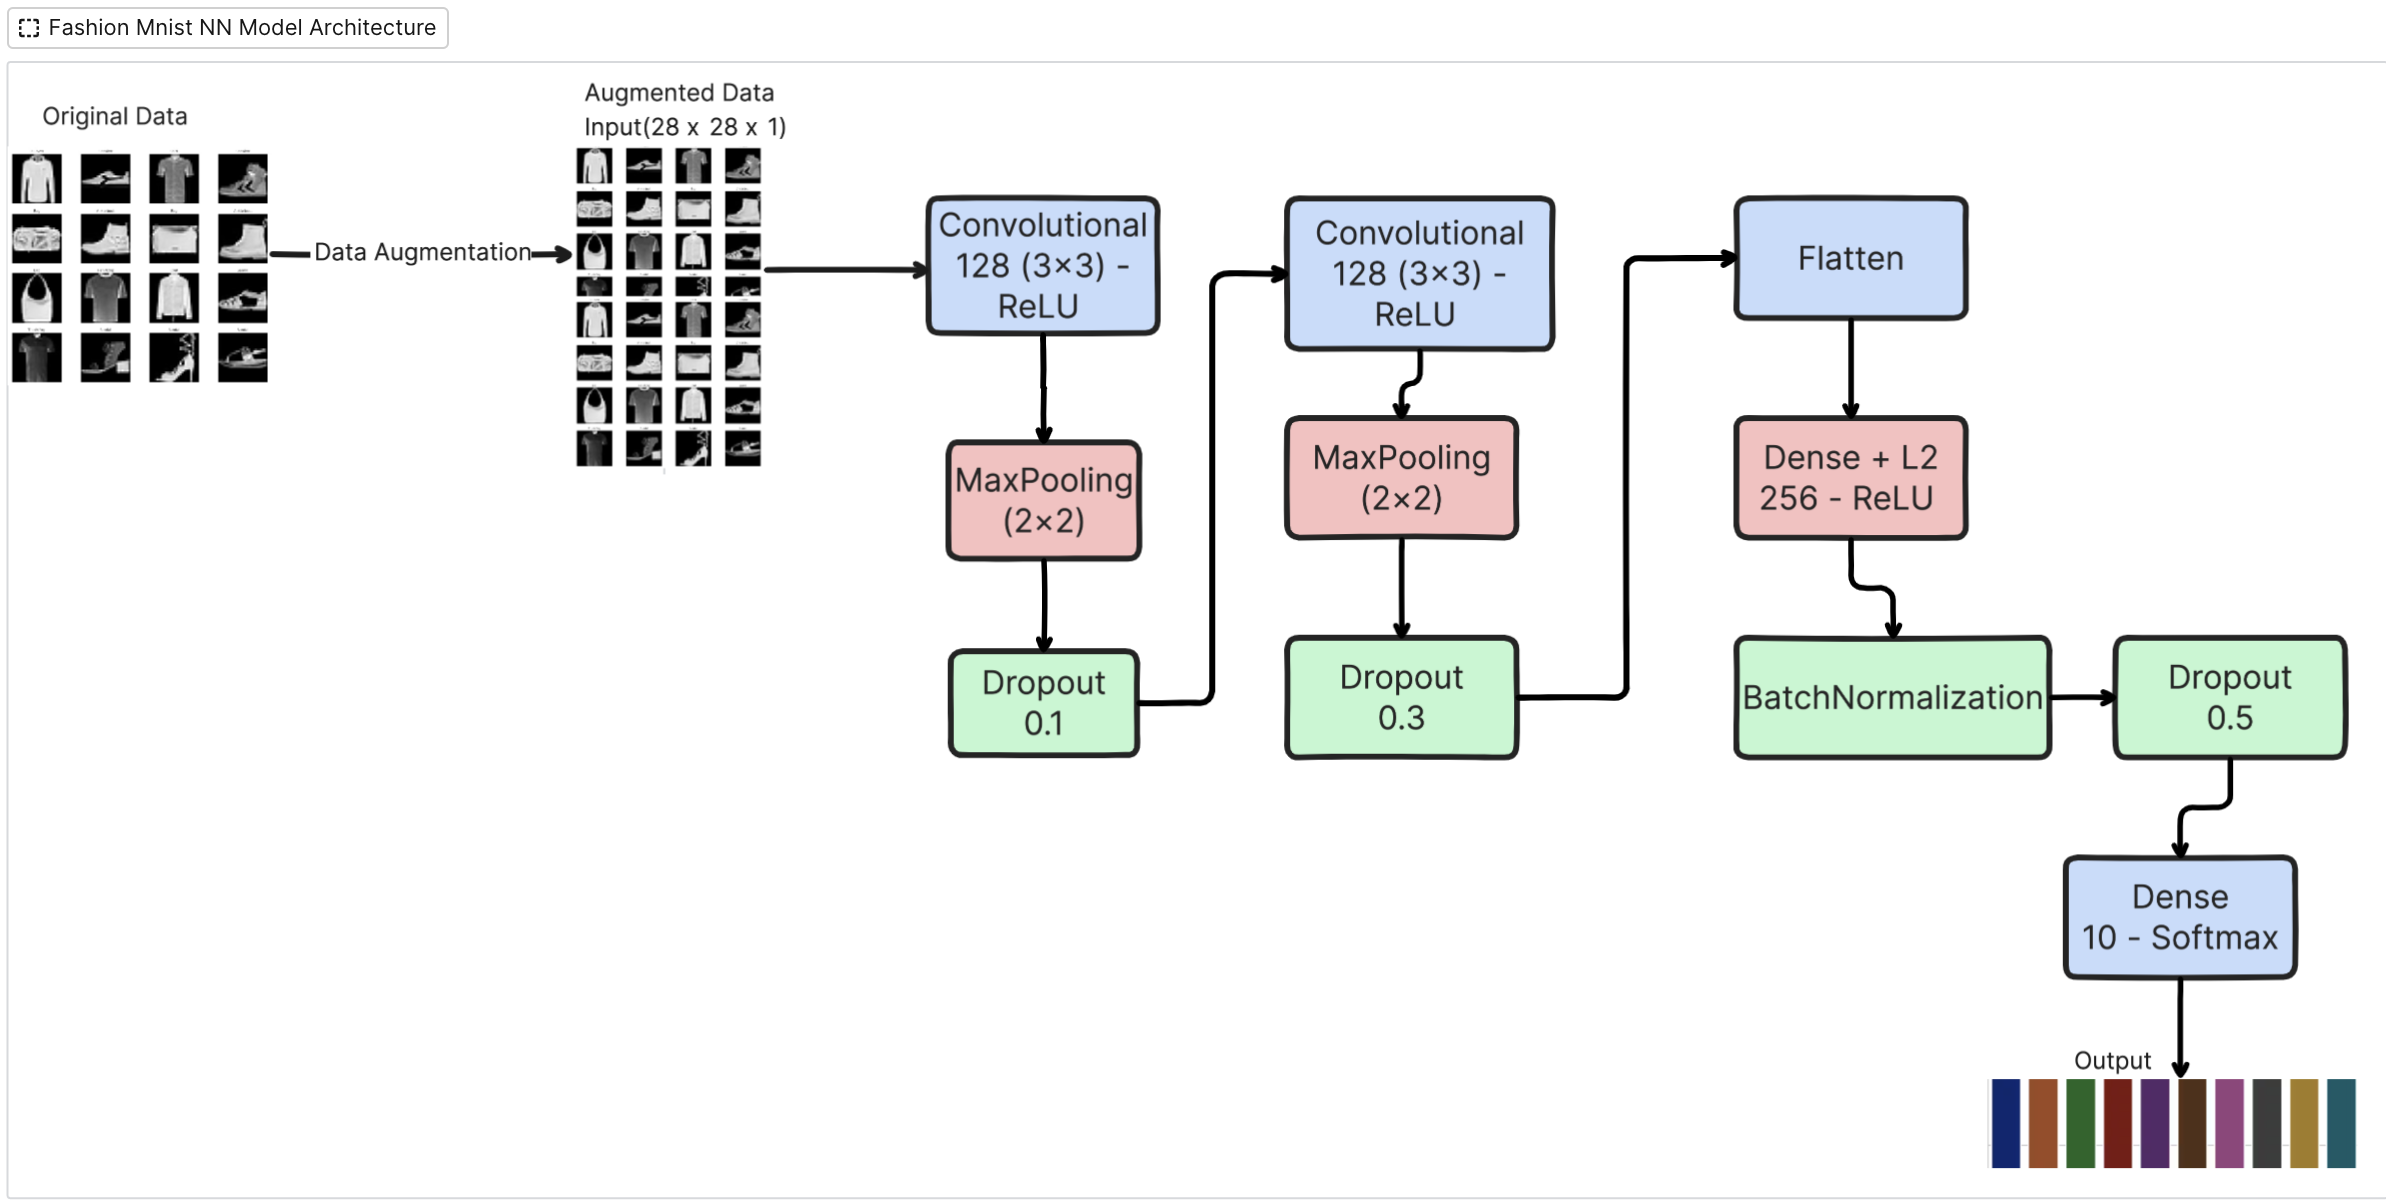

##**RESULT**

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9418 - loss: 0.2249
Test accuracy: 0.942300021648407


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with 2 rows for accuracy and loss
fig = make_subplots(rows=2, cols=1,
                    subplot_titles=('Model Accuracy', 'Model Loss'),
                    vertical_spacing=0.15)

# Get the total number of epochs (should be 50)
num_epochs = len(history.history['accuracy'])
epochs = list(range(1, num_epochs + 1))  # Create a list from 1 to num_epochs

# Add accuracy traces
fig.add_trace(
    go.Scatter(x=epochs,
               y=history.history['accuracy'],
               mode='lines',
               name='Train Accuracy',
               line=dict(color='blue')),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=epochs,
               y=history.history['val_accuracy'],
               mode='lines',
               name='Validation Accuracy',
               line=dict(color='red')),
    row=1, col=1
)

# Add loss traces
fig.add_trace(
    go.Scatter(x=epochs,
               y=history.history['loss'],
               mode='lines',
               name='Train Loss',
               line=dict(color='blue', dash='dash')),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=epochs,
               y=history.history['val_loss'],
               mode='lines',
               name='Validation Loss',
               line=dict(color='red', dash='dash')),
    row=2, col=1
)

# Update layout
fig.update_layout(
    height=800,
    width=900,
    title_text="Training and Validation Metrics",
    hovermode="x unified"
)

# Explicitly set x-axis range to ensure all 50 epochs are visible
fig.update_xaxes(title_text="Epoch", range=[0.5, 50.5], dtick=5, row=1, col=1)
fig.update_xaxes(title_text="Epoch", range=[0.5, 50.5], dtick=5, row=2, col=1)

# Update y-axes labels
fig.update_yaxes(title_text="Accuracy", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=2, col=1)

# Show figure
fig.show()

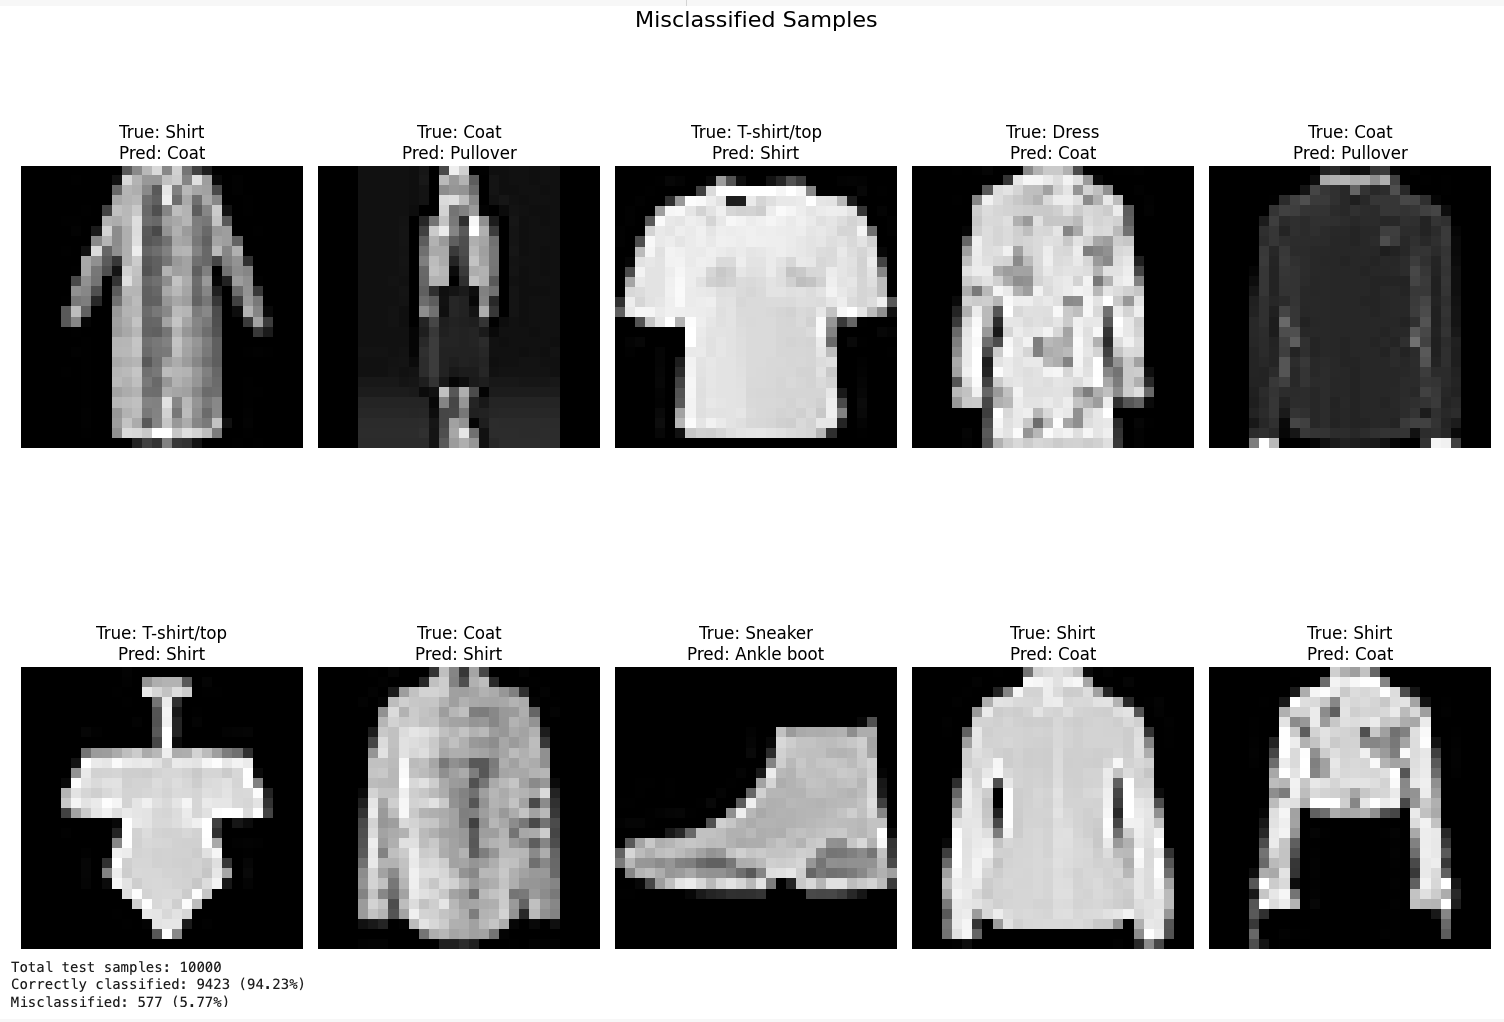

##F**UTURE WORK**

- Hyperparaters fine tuninng
- Transfer Learning